In [1]:
%load_ext autoreload
%autoreload

In [2]:
import tensorflow as tf
import numpy as np
import random
from tensorflow import keras
import matplotlib.pyplot as plt

# Just set some seeds so we are consistent
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
tf.compat.v1.random.set_random_seed(random_seed) # just so it is forward compatible

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Split train/test and scale features
type_max = float(np.iinfo(X_train_full.dtype).max) # gets max of type

X_valid, X_train = X_train_full[:5000] / type_max, X_train_full[5000:] / type_max
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / type_max

# Class names for y_train values
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Coat


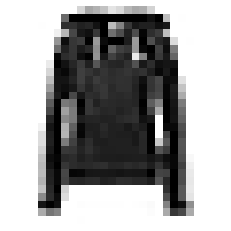

In [3]:
# Show a random sample from the training set 
index = random.randint(0, len(X_train))
print(class_names[y_train[index]])
plt.imshow(X_train[index], cmap="binary")
plt.axis("off")
plt.show()

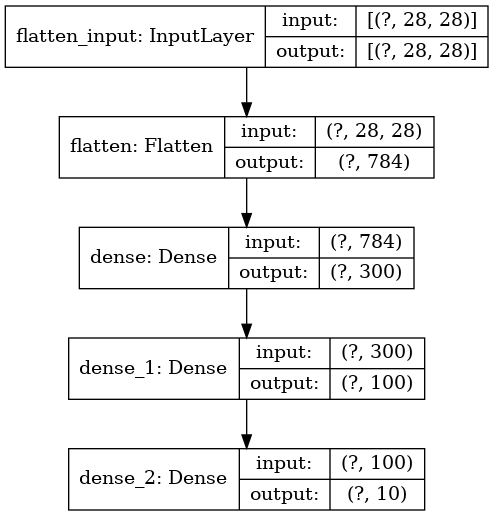

In [4]:
# Let's actually create a model now
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # Turns the 2D array image into a 1D array
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(len(class_names), activation="softmax") # We are guessing categories out of class_names
])



# The question/None marks are because the model doesn't know how many samples we are going to pass into it
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [8]:
from datetime import datetime
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrix=["accuracy"]
)

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


history = model.fit(X_train, y_train, 
                    epochs=25, 
                    validation_data=(X_valid, y_valid), 
                    batch_size=512, 
                    callbacks=[tensorboard_callback]
                   )
                                                   

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 1s 22us/sample - loss: 0.1613 - val_loss: 0.3050
Epoch 2/25
55000/55000 [==============================] - 1s 13us/sample - loss: 0.1504 - val_loss: 0.3005
Epoch 3/25
55000/55000 [==============================] - 1s 13us/sample - loss: 0.1451 - val_loss: 0.3030
Epoch 4/25
55000/55000 [==============================] - 1s 13us/sample - loss: 0.1407 - val_loss: 0.3136
Epoch 5/25
55000/55000 [==============================] - 1s 13us/sample - loss: 0.1339 - val_loss: 0.3113
Epoch 6/25
55000/55000 [==============================] - 1s 13us/sample - loss: 0.1314 - val_loss: 0.3231
Epoch 7/25
55000/55000 [==============================] - 1s 13us/sample - loss: 0.1247 - val_loss: 0.3199
Epoch 8/25
55000/55000 [==============================] - 1s 13us/sample - loss: 0.1198 - val_loss: 0.3268
Epoch 9/25
55000/55000 [==============================] - 1s 13us/sample - loss: 0.1196 - val_l

{'batch_size': 512, 'epochs': 25, 'steps': 108, 'samples': 55000, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'val_loss']}


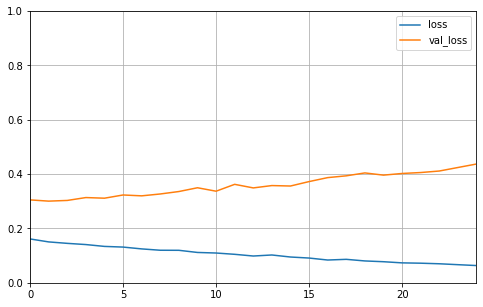

{'name': 'sequential', 'layers': [{'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'batch_input_shape': (None, 28, 28), 'dtype': 'float32', 'data_format': 'channels_last'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 300, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 100, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kerne

In [9]:
print(history.params)
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
#model.save("keras_mnist_fashion", save_format="tf")
print(model.get_config())